In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt

In [3]:
def DataGet():
    data = pd.read_csv("AER_credit_card_data.csv")
    data['card']=data["card"].map({"yes":1, "no":0})
    data["selfemp"]=data['selfemp'].map({"yes":1, "no":0})
    data["owner"]=data['owner'].map({"yes":1, "no":0})
    y = data['card']#目標列
    X = data.drop(columns="card", axis=1)#特徵
    return X, y, data

In [4]:
X, y, data = DataGet()

In [5]:
def PlotGaussian(mean0, std0, label, color, X):
    sigma = np.sqrt(std0)
    if sigma==0:
        return
    #x = np.linspace(mean0 - 3*sigma, mean0 + 3*sigma, 100)#隨機從中取100個值當變量 根據三西格瑪原則
    X = np.sort(X[(X>=(mean0-3*sigma)) & (X<=(mean0+3*sigma))])
    #1/(std*根號(2pi))*(自然數)**((-1/2)*((x-mean)/std)**2)
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((X - mean0)/ sigma) ** 2)#高斯分布
    plt.plot(X, y, label=f'{label}', color=color)

C:\Users\RCK\AppData\Local\Temp\ipykernel_12320\2595208412.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((X - mean0)/ sigma) ** 2)#高斯分布
C:\Users\RCK\AppData\Local\Temp\ipykernel_12320\2595208412.py:6: RuntimeWarning: invalid value encountered in divide
  y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((X - mean0)/ sigma) ** 2)#高斯分布


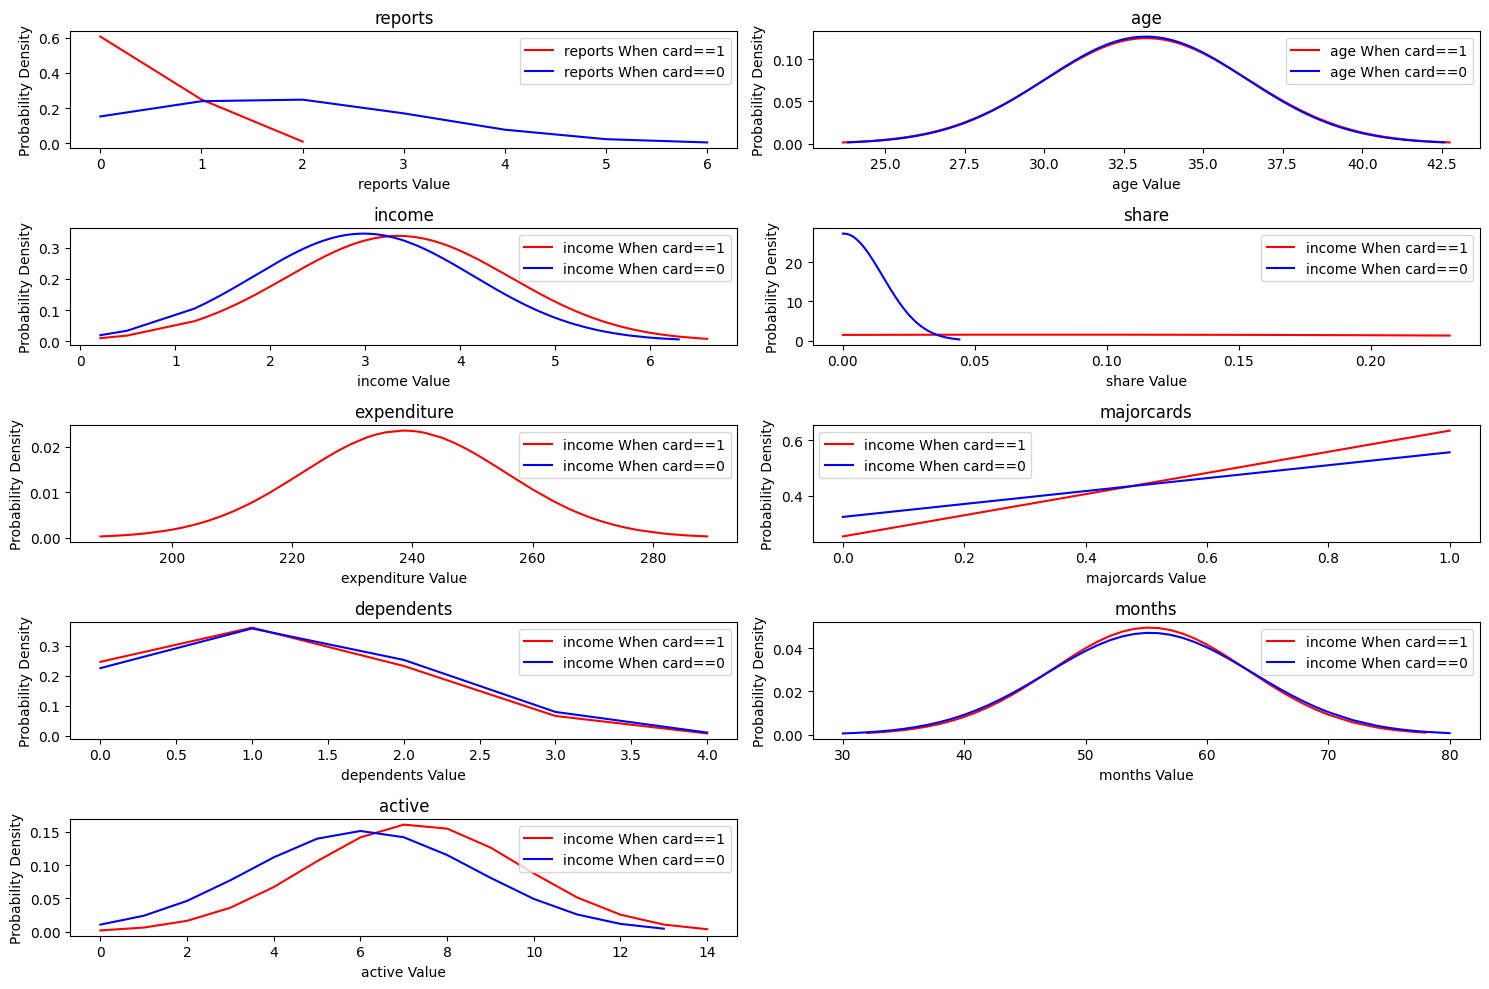

In [47]:
plt.figure(figsize=(15, 10))
plt.subplot(5, 2, 1)
PlotGaussian(data["reports"][data["card"]==1].mean(), data["reports"][data["card"]==1].std(), 'reports When card==1', 'red', data["reports"])
PlotGaussian(data["reports"][data["card"]==0].mean(), data["reports"][data["card"]==0].std(), 'reports When card==0', 'blue', data["reports"])
plt.title('reports')
plt.xlabel('reports Value')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(5, 2, 2)
PlotGaussian(data["age"][data["card"]==1].mean(), data["age"][data["card"]==1].std(), 'age When card==1', 'red', data["age"])
PlotGaussian(data["age"][data["card"]==0].mean(), data["age"][data["card"]==0].std(), 'age When card==0', 'blue', data["age"])
plt.title('age')
plt.xlabel('age Value')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(5, 2, 3)
PlotGaussian(data["income"][data["card"]==1].mean(), data["income"][data["card"]==1].std(), 'income When card==1', 'red', data["income"])
PlotGaussian(data["income"][data["card"]==0].mean(), data["income"][data["card"]==0].std(), 'income When card==0', 'blue', data["income"])
plt.title('income')
plt.xlabel('income Value')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(5, 2, 4)
PlotGaussian(data["share"][data["card"]==1].mean(), data["share"][data["card"]==1].std(), 'income When card==1', 'red', data["share"])
PlotGaussian(data["share"][data["card"]==0].mean(), data["share"][data["card"]==0].std(), 'income When card==0', 'blue', data["share"])
plt.title('share')
plt.xlabel('share Value')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(5, 2, 5)
PlotGaussian(data["expenditure"][data["card"]==1].mean(), data["expenditure"][data["card"]==1].std(), 'income When card==1', 'red', data["expenditure"])
PlotGaussian(data["expenditure"][data["card"]==0].mean(), data["expenditure"][data["card"]==0].std(), 'income When card==0', 'blue', data["expenditure"])
plt.title('expenditure')
plt.xlabel('expenditure Value')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(5, 2, 6)
PlotGaussian(data["majorcards"][data["card"]==1].mean(), data["majorcards"][data["card"]==1].std(), 'income When card==1', 'red', data["majorcards"])
PlotGaussian(data["majorcards"][data["card"]==0].mean(), data["majorcards"][data["card"]==0].std(), 'income When card==0', 'blue', data["majorcards"])
plt.title('majorcards')
plt.xlabel('majorcards Value')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(5, 2, 7)
PlotGaussian(data["dependents"][data["card"]==1].mean(), data["dependents"][data["card"]==1].std(), 'income When card==1', 'red', data["dependents"])
PlotGaussian(data["dependents"][data["card"]==0].mean(), data["dependents"][data["card"]==0].std(), 'income When card==0', 'blue', data["dependents"])
plt.title('dependents')
plt.xlabel('dependents Value')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(5, 2, 8)
PlotGaussian(data["months"][data["card"]==1].mean(), data["months"][data["card"]==1].std(), 'income When card==1', 'red', data["months"])
PlotGaussian(data["months"][data["card"]==0].mean(), data["months"][data["card"]==0].std(), 'income When card==0', 'blue', data["months"])
plt.title('months')
plt.xlabel('months Value')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(5, 2, 9)
PlotGaussian(data["active"][data["card"]==1].mean(), data["active"][data["card"]==1].std(), 'income When card==1', 'red', data["active"])
PlotGaussian(data["active"][data["card"]==0].mean(), data["active"][data["card"]==0].std(), 'income When card==0', 'blue', data["active"])
plt.title('active')
plt.xlabel('active Value')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=1)
#plt.show()
plt.savefig(r"D:\Github\Issue_Credit_Card\PlotGaussian.png")